<a href="https://colab.research.google.com/github/Raseeec/APD_24-0/blob/main/APD_Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
#Cargar datos
data = pd.read_csv('Wine.csv', sep=',',names=["Cultivar","Alcohol","Malic","Ash","Alkalinity","Magnesium","Phenols","Flavanoids","Nonflav","Proanthocyan","Color","Hue","OD280","Proline"])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cultivar      178 non-null    int64  
 1   Alcohol       178 non-null    float64
 2   Malic         178 non-null    float64
 3   Ash           178 non-null    float64
 4   Alkalinity    178 non-null    float64
 5   Magnesium     178 non-null    int64  
 6   Phenols       178 non-null    float64
 7   Flavanoids    178 non-null    float64
 8   Nonflav       178 non-null    float64
 9   Proanthocyan  178 non-null    float64
 10  Color         178 non-null    float64
 11  Hue           178 non-null    float64
 12  OD280         178 non-null    float64
 13  Proline       178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Cultivar,Alcohol,Malic,Ash,Alkalinity,Magnesium,Phenols,Flavanoids,Nonflav,Proanthocyan,Color,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


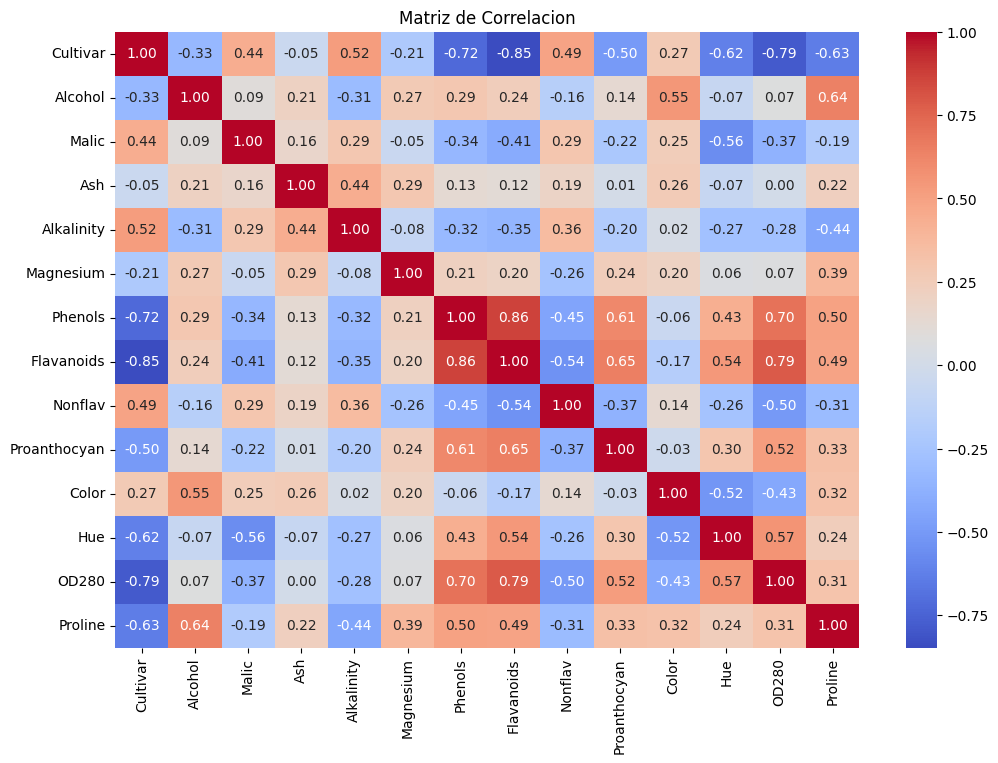

In [ ]:
#Matriz de correlación utilizando un mapa de calor
matriz_corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlacion')
plt.show()

In [140]:
#Separar características y variable objetivo
X = data.drop('Cultivar', axis=1)
y = data['Cultivar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(X_train.shape)#Para el training
print(X_test.shape)#Para el test

(124, 13)
(54, 13)


In [141]:
#Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)#Para el training
print(X_test_scaled.shape)#Para el test

(124, 13)
(54, 13)


In [142]:
#Modelo Podado
modelo = DecisionTreeClassifier(ccp_alpha=0.01)
modelo.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [143]:
#Precision Arbol Podado
y_pred = modelo.predict(X_test_scaled)
print("Precisión del Arbol Podado:", accuracy_score(y_test, y_pred))

Precisión del Arbol Podado: 0.8703703703703703


In [144]:
#Modelo de Red Neuronal
modelo_red = MLPClassifier(hidden_layer_sizes=(50,25),activation='relu',random_state=100)
modelo_red.fit(X_train_scaled, y_train)
y_pred_nn = modelo_red.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Precisión de la Red Neuronal: 0.96

Informe de clasificación:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.95      0.95      0.95        19
           3       0.95      0.95      0.95        21

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54
 



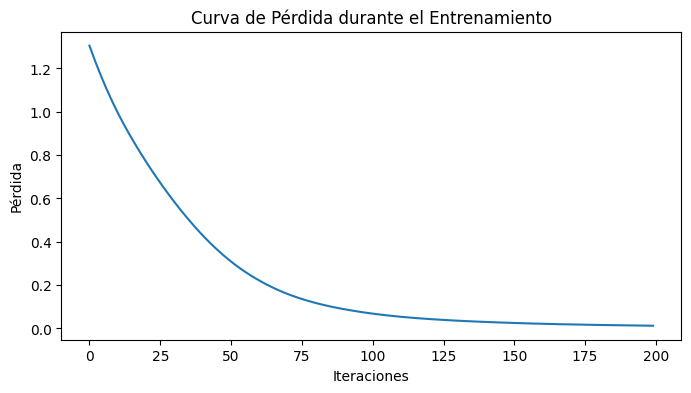

In [150]:
#Precisión del modelo
accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Precisión de la Red Neuronal: {accuracy:.2f}\n")

#Informe de clasificación
report = classification_report(y_test, y_pred_nn)
print("Informe de clasificación:\n", report,"\n")

#Visualizar la curva de pérdida durante el entrenamiento
plt.figure(figsize=(8, 4))
plt.plot(modelo_red.loss_curve_)
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.show()

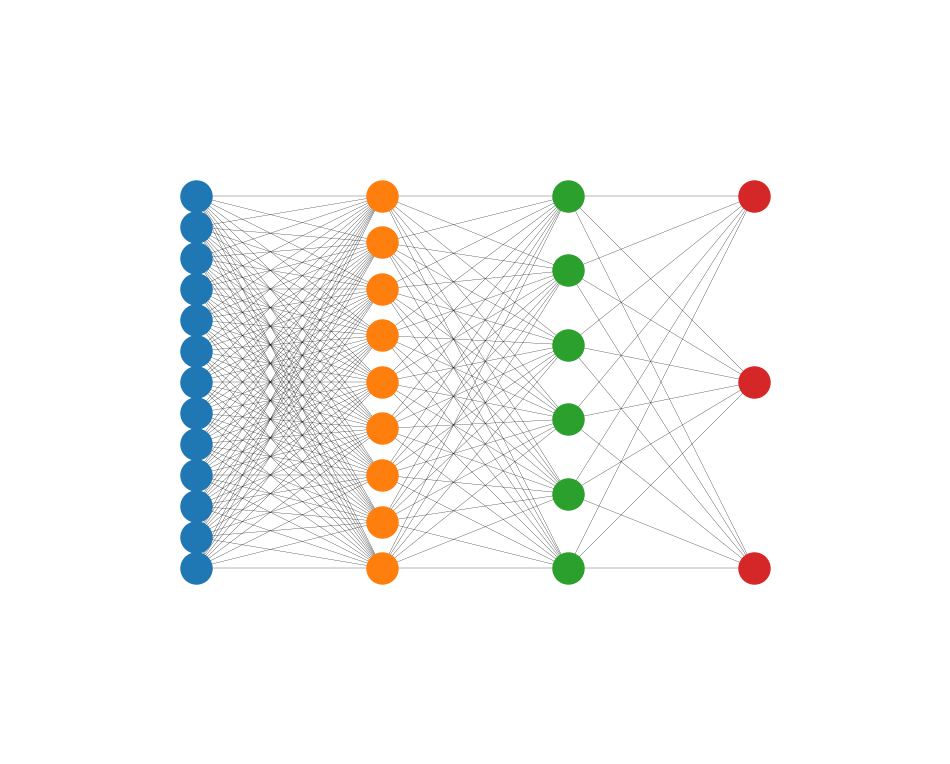

In [146]:
#Definimos el tamaño de los layers
layer_sizes = [13, 9, 6, 3]

v_spacing = 0.8
h_spacing = 1.0

fig, ax = plt.subplots(figsize=(12, 12))

for n, layer_size in enumerate(layer_sizes):
    layer_y = np.linspace(-1, 1, layer_size)
    ax.scatter([n * h_spacing] * layer_size, layer_y, s=500, zorder=3)

for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
    for neuron_index_a, neuron_a in enumerate(np.linspace(-1, 1, layer_size_a)):
        neuron_indices_b = np.random.choice(range(layer_size_b), size=min(10, layer_size_b), replace=False)
        for neuron_index_b in neuron_indices_b:
            neuron_b = np.linspace(-1, 1, layer_size_b)[neuron_index_b]
            ax.plot([n * h_spacing, (n + 1) * h_spacing], [neuron_a, neuron_b], 'k-', linewidth=0.2, zorder=2)

ax.set_aspect('equal')
ax.axis('off')
ax.set_xlim(-1, len(layer_sizes) * h_spacing)
ax.set_ylim(-2, 2)

plt.show()

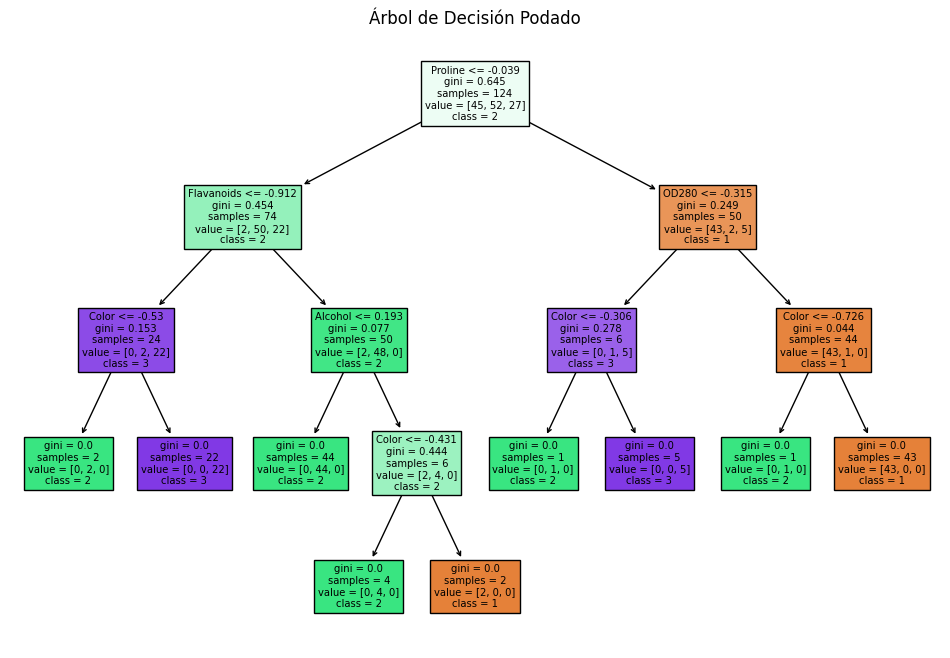

In [158]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12,8))
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.title("Árbol de Decisión Podado")
plt.show()

In [ ]:
#Validación cruzada para el Arbol Podado
val_pod = cross_val_score(modelo, X_train, y_train, cv=5)
print("Arbol de Decision - Validación Cruzada:", np.mean(val_pod))

Arbol de Decision - Validación Cruzada: 0.9193333333333333


In [ ]:
#Validación Cruzada para la Red Neuronal
val_red = cross_val_score(modelo_red, X_train_scaled, y_train, cv=5)
print("Red Neuronal - Validación Cruzada:", np.mean(val_red))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Red Neuronal - Validación Cruzada: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


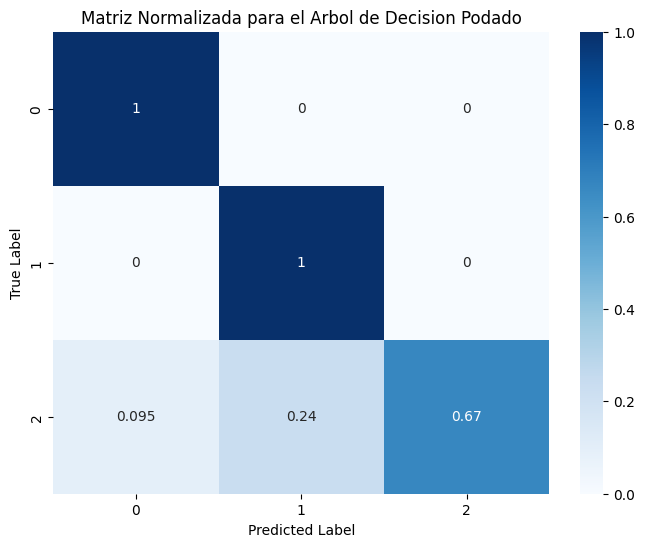

In [160]:
#Matriz de Confusión para el Arbol Podado
matriz_norm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz Normalizada para el Arbol de Decision Podado')
plt.show()

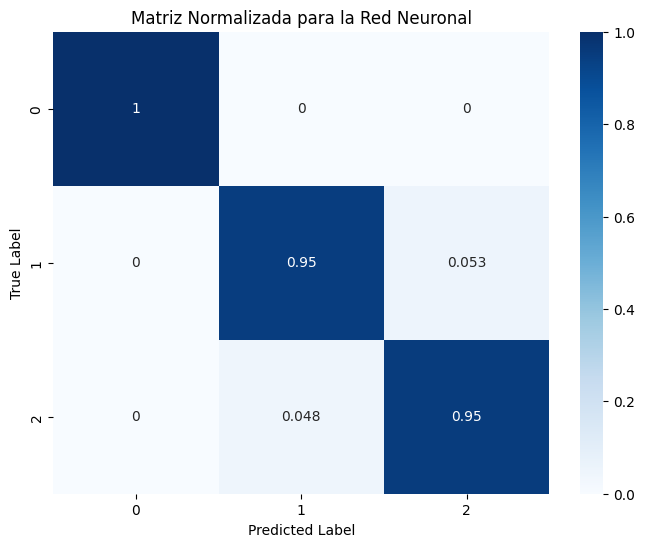

In [ ]:
#Matriz de para la Red Neuronal
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz Normalizada para la Red Neuronal')
plt.show()

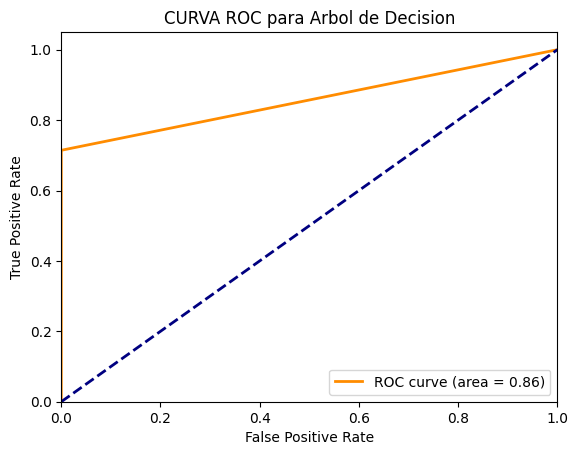

In [113]:
#Curva ROC para el Arbol de Decision
#Binarizar la salida
y_bin = label_binarize(y, classes=[1, 2, 3])
n_classes = y_bin.shape[1]

#Dividir de nuevo considerando la salida binarizada
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=100)

#Aprender a predecir cada clase contra el resto
modelo.fit(X_train, y_train)
y_score = modelo.predict_proba(X_test)

#Calcular ROC por clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Calcular micro-promedio ROC curve y ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Graficar Curva ROC para una clase
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CURVA ROC para Arbol de Decision')
plt.legend(loc="lower right")
plt.show()

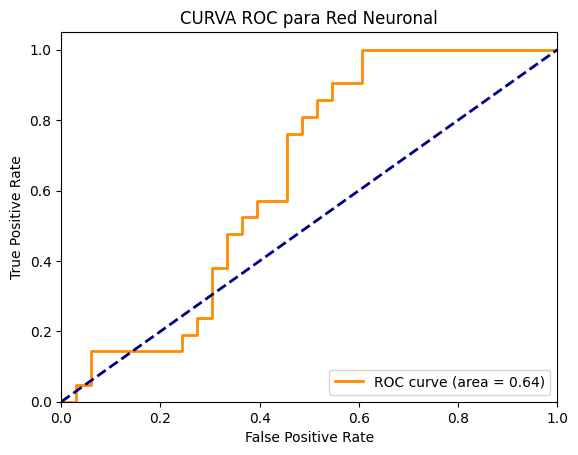

In [ ]:
#Curva ROC Red Neuronal
#Binarizar la salida
y_bin = label_binarize(y, classes=[1, 2, 3])
n_classes = y_bin.shape[1]

#Dividir de nuevo considerando la salida binarizada
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=100)

#Aprender a predecir cada clase contra el resto
modelo_red.fit(X_train, y_train)
y_score = modelo_red.predict_proba(X_test)

#Calcular ROC por clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Calcular micro-promedio ROC curve y ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Graficar Curva ROC para una clase
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CURVA ROC para Red Neuronal')
plt.legend(loc="lower right")
plt.show()

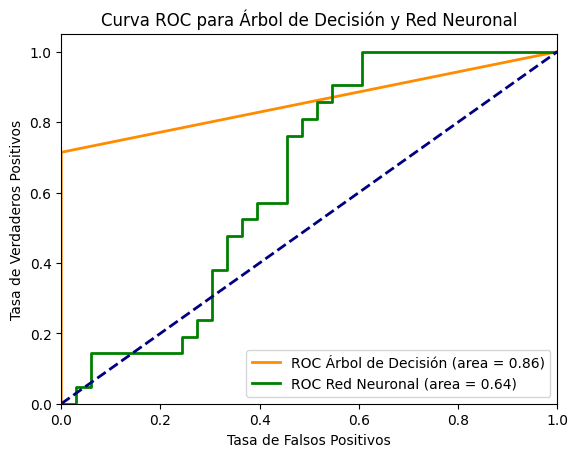

In [120]:
#Comparacion curvas ROC
#Binarizar la salida
y_bin = label_binarize(y, classes=[1, 2, 3])
n_classes = y_bin.shape[1]

#Dividir de nuevo considerando la salida binarizada
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=100)

#Aprender a predecir cada clase contra el resto para Árbol de Decisión
modelo.fit(X_train, y_train)
y_score_tree = modelo.predict_proba(X_test)

# Aprender a predecir cada clase contra el resto para Red Neuronal
modelo_red.fit(X_train, y_train)
y_score_nn = modelo_red.predict_proba(X_test)

# Calcular ROC por clase para Árbol de Decisión
fpr_tree = dict()
tpr_tree = dict()
roc_auc_tree = dict()
for i in range(n_classes):
    fpr_tree[i], tpr_tree[i], _ = roc_curve(y_test_bin[:, i], y_score_tree[:, i])
    roc_auc_tree[i] = auc(fpr_tree[i], tpr_tree[i])

# Calcular micro-promedio ROC curve y ROC area para Árbol de Decisión
fpr_tree["micro"], tpr_tree["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_tree.ravel())
roc_auc_tree["micro"] = auc(fpr_tree["micro"], tpr_tree["micro"])

# Calcular ROC por clase para Red Neuronal
fpr_nn = dict()
tpr_nn = dict()
roc_auc_nn = dict()
for i in range(n_classes):
    fpr_nn[i], tpr_nn[i], _ = roc_curve(y_test_bin[:, i], y_score_nn[:, i])
    roc_auc_nn[i] = auc(fpr_nn[i], tpr_nn[i])

# Calcular micro-promedio ROC curve y ROC area para Red Neuronal
fpr_nn["micro"], tpr_nn["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_nn.ravel())
roc_auc_nn["micro"] = auc(fpr_nn["micro"], tpr_nn["micro"])

# Graficar Curva ROC para ambas clases en un solo gráfico
plt.figure()
lw = 2

# Curva ROC para Árbol de Decisión (clase 2)
plt.plot(fpr_tree[2], tpr_tree[2], color='darkorange', lw=lw, label='ROC Árbol de Decisión (area = %0.2f)' % roc_auc_tree[2])

# Curva ROC para Red Neuronal (clase 2)
plt.plot(fpr_nn[2], tpr_nn[2], color='green', lw=lw, label='ROC Red Neuronal (area = %0.2f)' % roc_auc_nn[2])

# Línea diagonal
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Ajustes de la gráfica
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Árbol de Decisión y Red Neuronal')
plt.legend(loc="lower right")
plt.show()

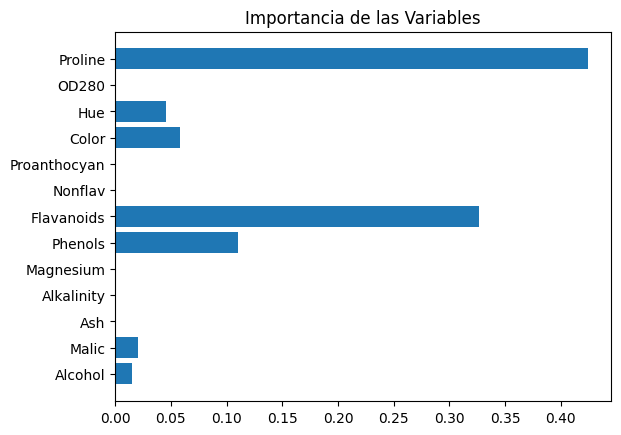

In [ ]:
#Importancia de las variables para el Árbol de Decisión
importancia_vars = modelo.feature_importances_
plt.barh(range(len(importancia_vars)), importancia_vars)
plt.yticks(range(len(X.columns)), X.columns)
plt.title("Importancia de las Variables")
plt.show()

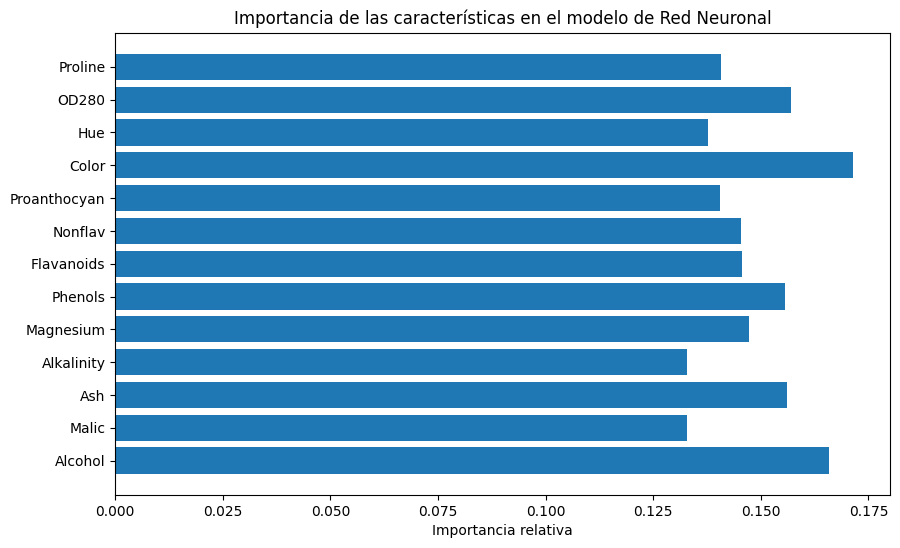

In [ ]:
# Obtener los coeficientes de los pesos entre la capa de entrada y la primera capa oculta
coefs_input_hidden = modelo_red.coefs_[0]

# Calcular el valor absoluto de los coeficientes para visualizar la importancia relativa
importance = abs(coefs_input_hidden)

# Obtener los nombres de las características
feature_names = X.columns

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importance.mean(axis=1), align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importancia relativa')
plt.title('Importancia de las características en el modelo de Red Neuronal')
plt.show()

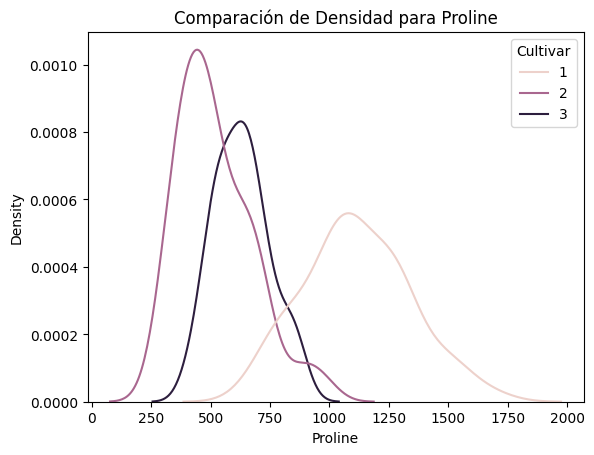

In [ ]:
#Comparación de densidad (Ejemplo con una variable)
sns.kdeplot(data=data, x="Proline", hue="Cultivar")
plt.title('Comparación de Densidad para Proline')
plt.show()